In [98]:
import pandas as pd

In [99]:
hr_df = pd.read_csv("/content/Human_Resources.csv")

In [100]:
hr_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [101]:
hr_df["Attrition"] = hr_df["Attrition"].apply(lambda x: 1 if x == "Yes" else 0)
hr_df["Over18"] = hr_df["Over18"].apply(lambda x: 1 if x == "Y" else 0)
hr_df["OverTime"] = hr_df["OverTime"].apply(lambda x: 1 if x == "Yes" else 0)

In [102]:
import seaborn as sns

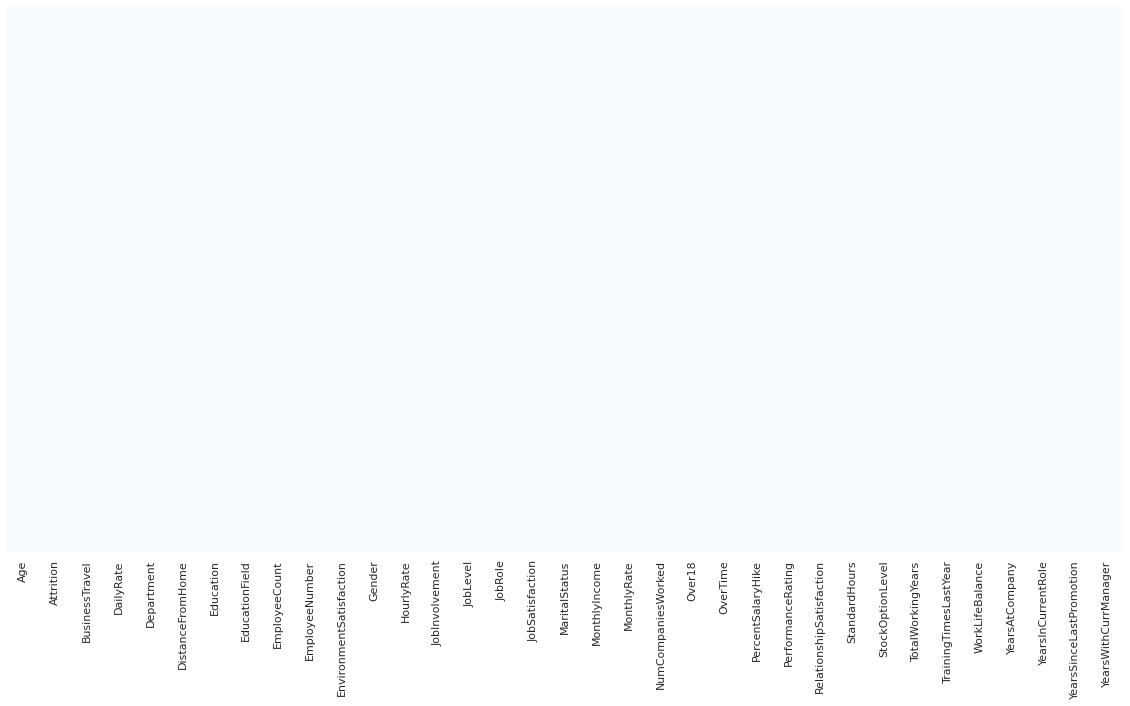

In [103]:
sns.set(rc = {'figure.figsize':(20,10)})
sns.heatmap(hr_df.isnull(), yticklabels=False, cbar=False, cmap="Blues")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7cb312bb90>,
      dtype=object)

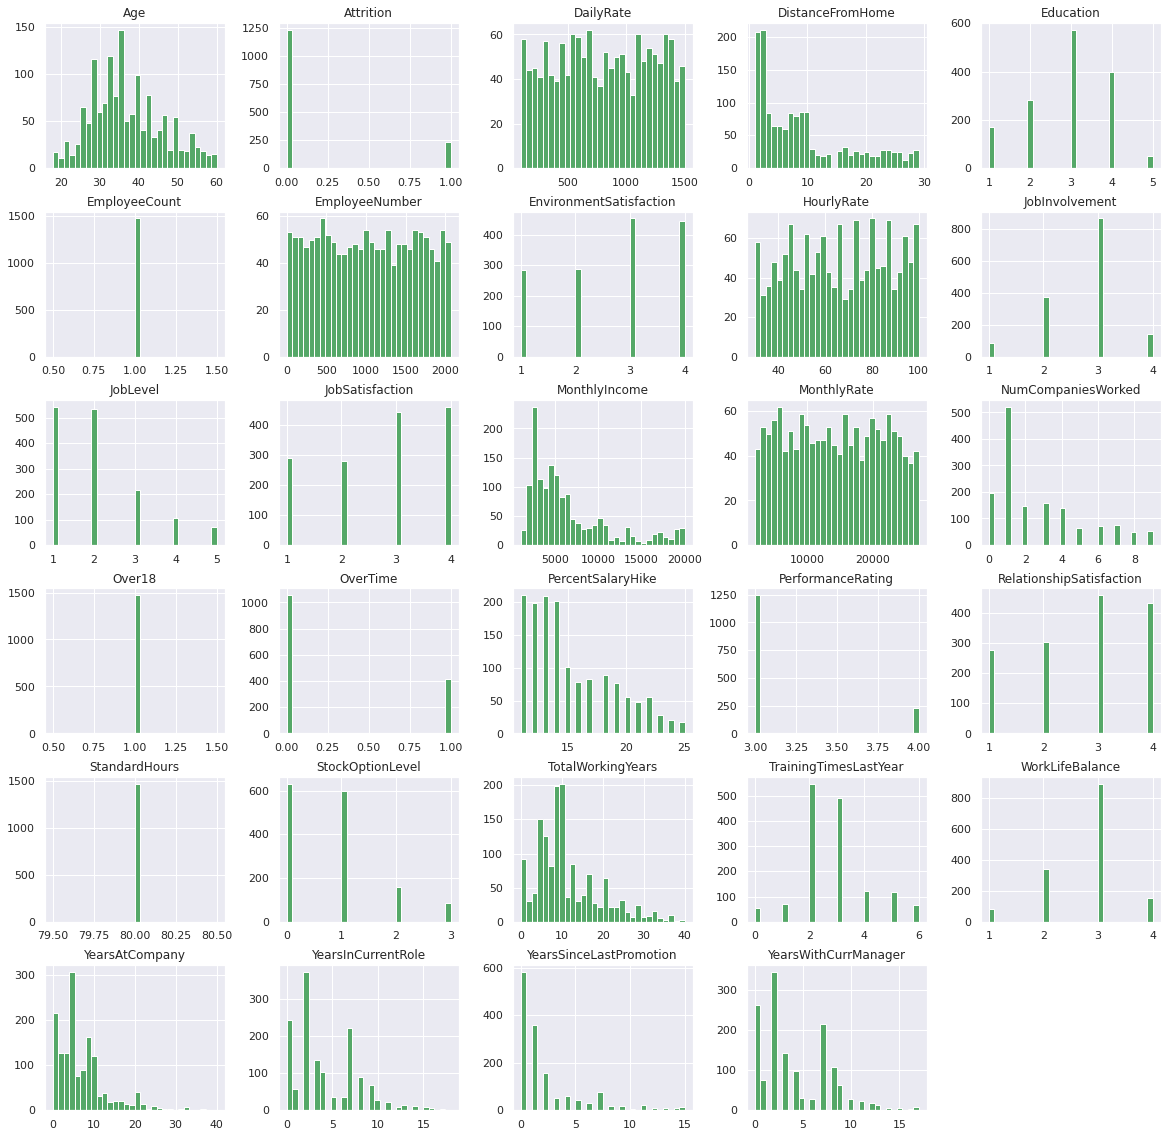

In [104]:
hr_df.hist(bins=30, color="g", figsize=(20, 20))

In [105]:
hr_df.drop(["EmployeeCount", "EmployeeNumber", "StandardHours", "Over18"], axis=1, inplace=True)

In [106]:
left_company_df = hr_df[hr_df["Attrition"] == 1]
stayed_company_df = hr_df[hr_df["Attrition"] == 0]

In [107]:
total_employees =  (len(left_company_df)) + (len(stayed_company_df))
percent_left = len(left_company_df) / total_employees
percent_stayed = len(stayed_company_df) / total_employees

print(percent_left)
print(percent_stayed)


0.16122448979591836
0.8387755102040816


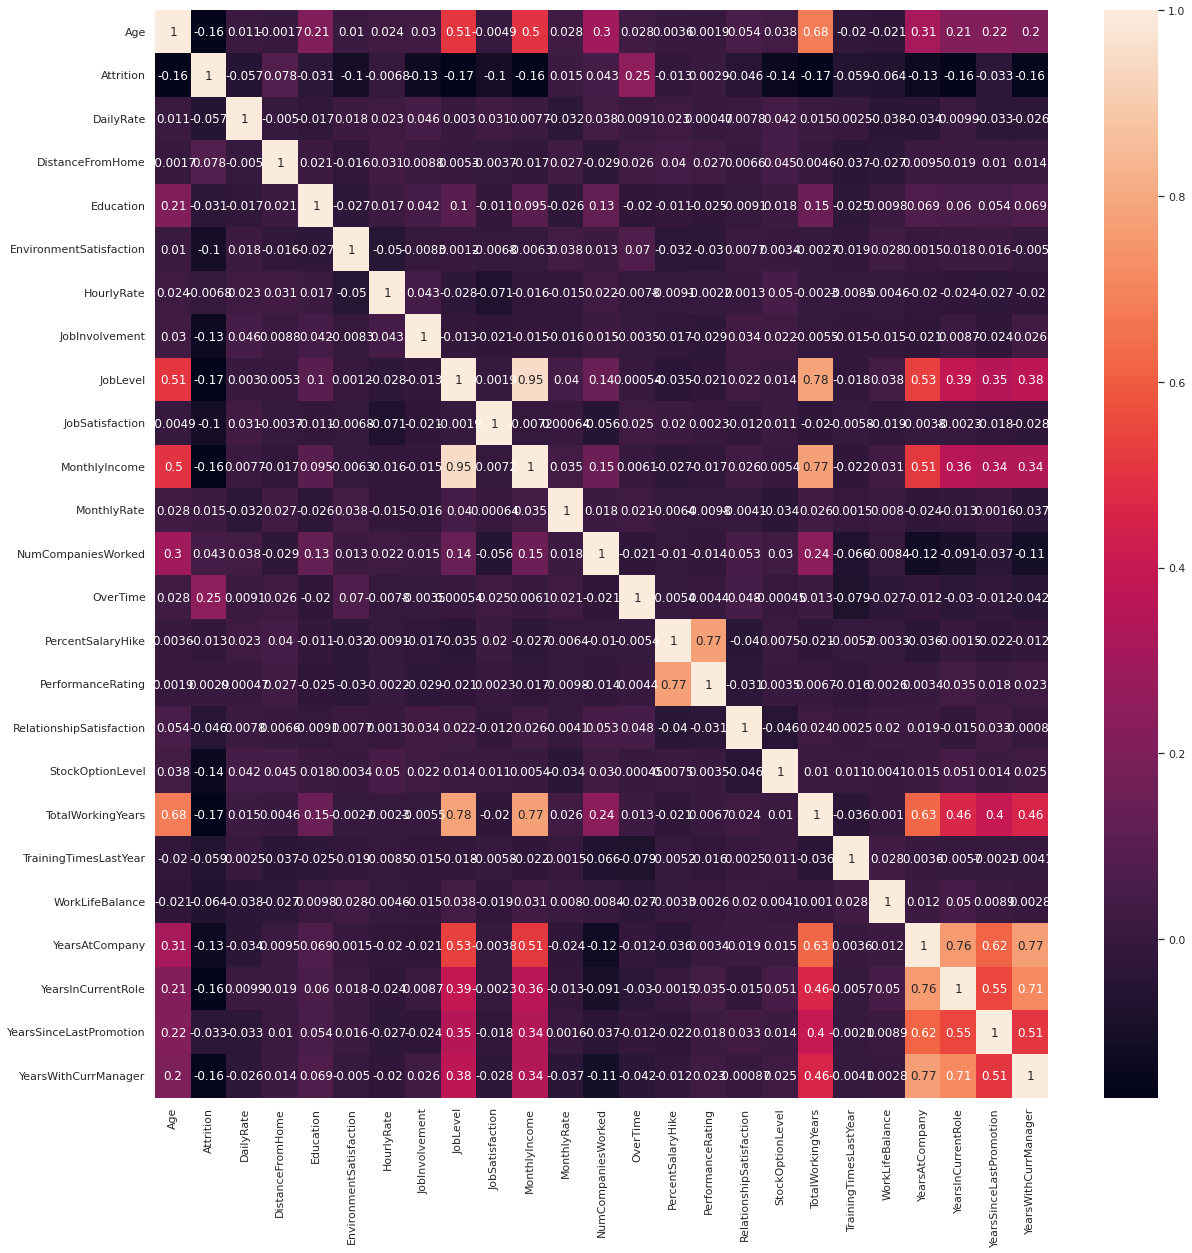

In [108]:
import matplotlib.pyplot as plt

correlations = hr_df.corr()
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations, annot=True)

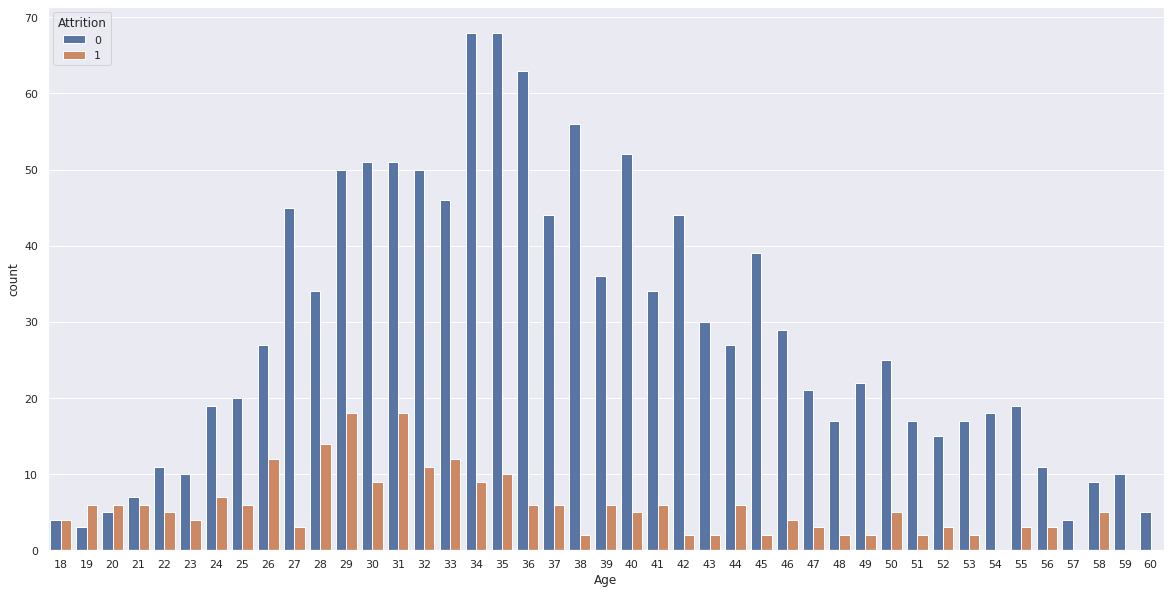

In [109]:
plt.figure(figsize=[20,10])
sns.countplot(x="Age", hue="Attrition", data=hr_df)

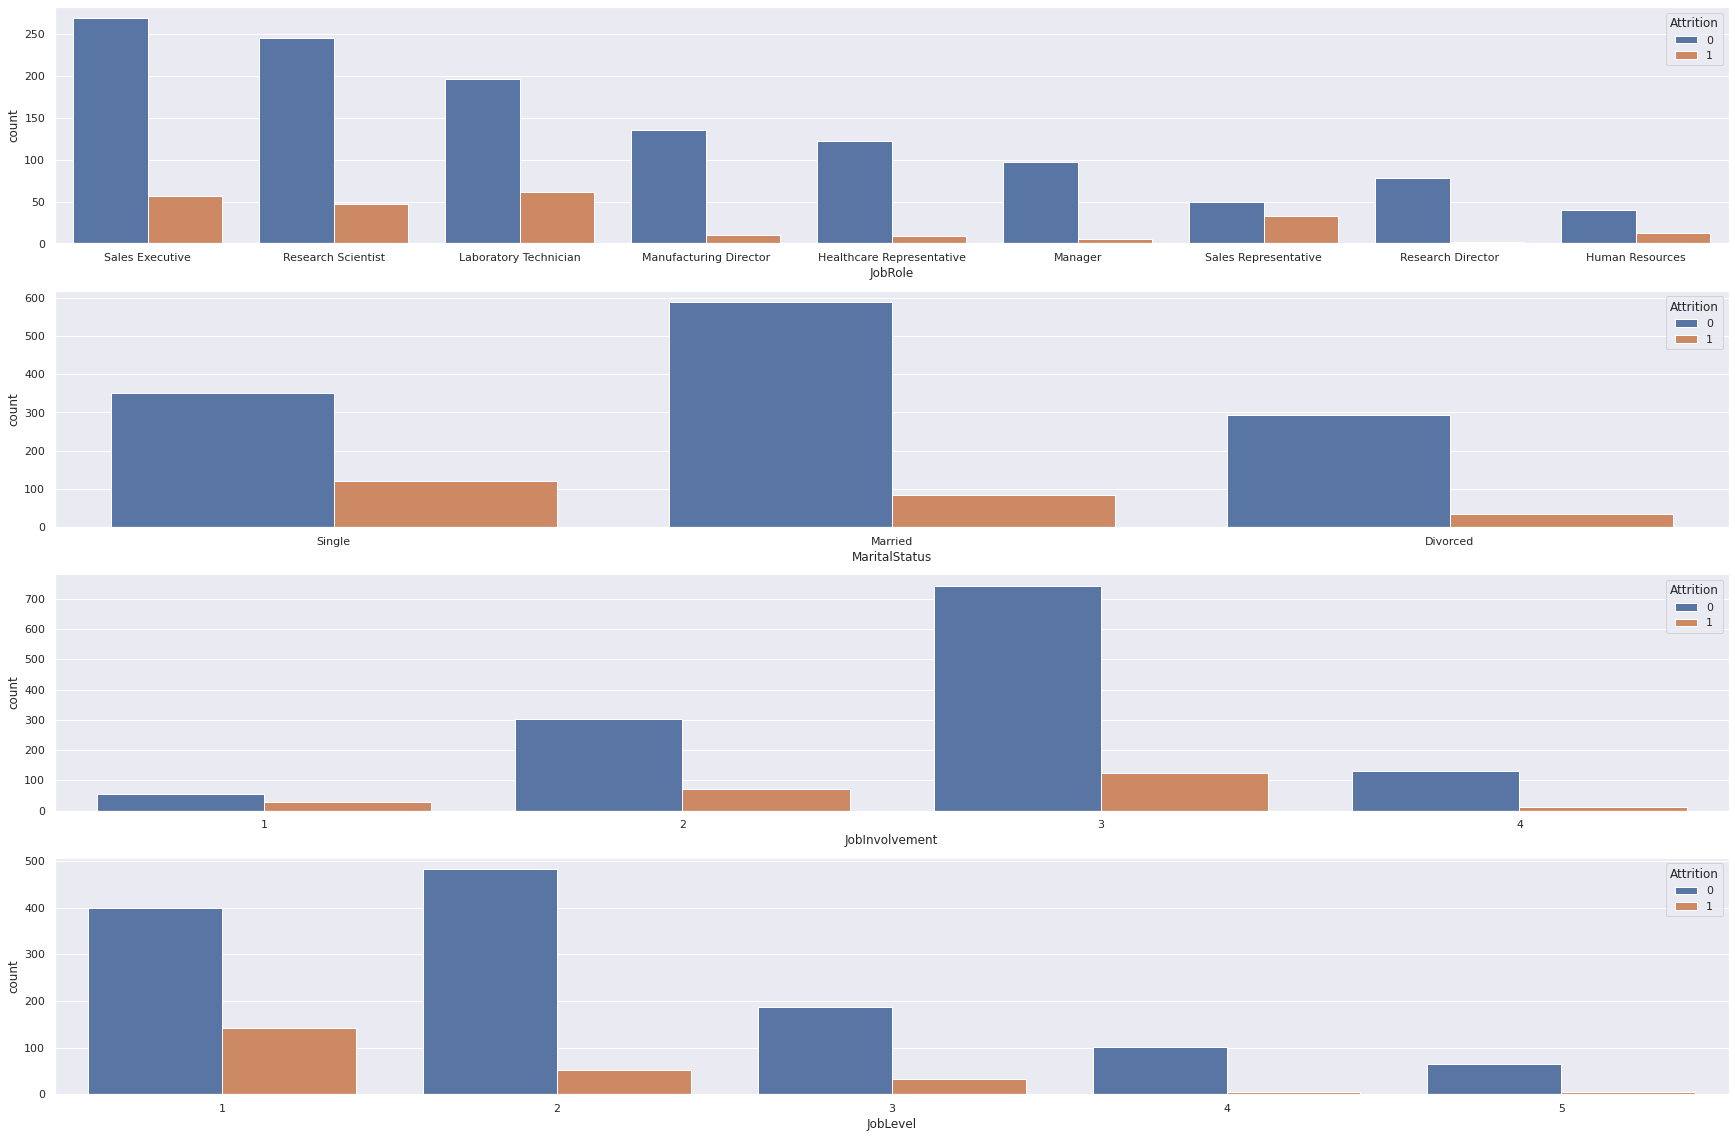

In [110]:
plt.figure(figsize=[30,20])
plt.subplot(411)
sns.countplot(x="JobRole", hue="Attrition", data=hr_df)

plt.subplot(412)
sns.countplot(x="MaritalStatus", hue="Attrition", data=hr_df)

plt.subplot(413)
sns.countplot(x="JobInvolvement", hue="Attrition", data=hr_df)

plt.subplot(414)
sns.countplot(x="JobLevel", hue="Attrition", data=hr_df)


Text(0.5, 0, 'Distance From Home')

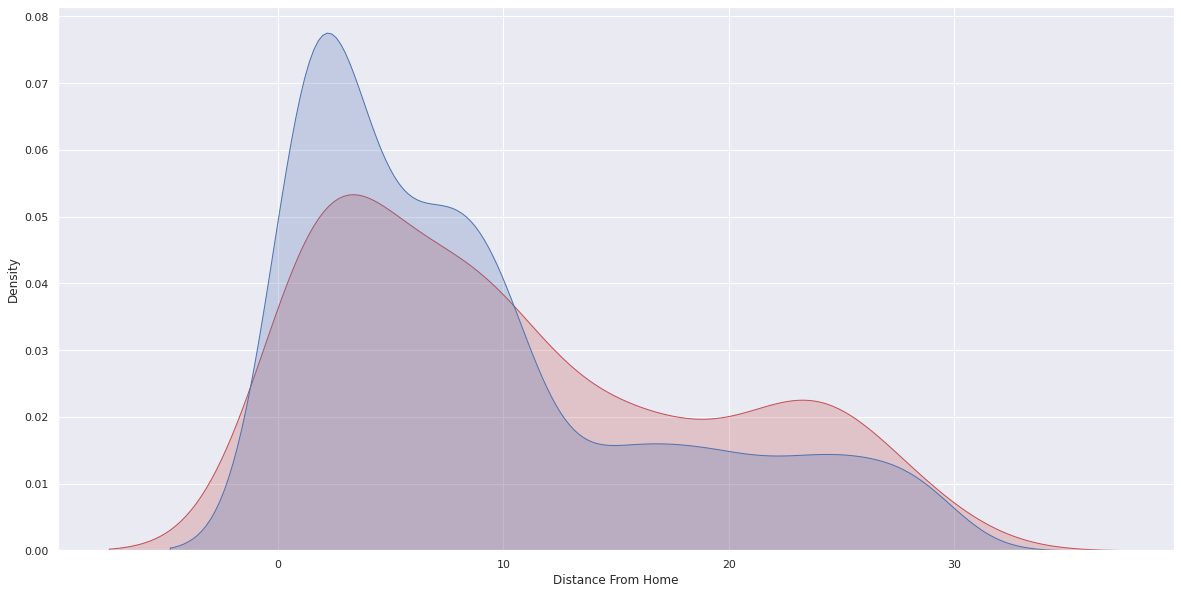

In [111]:
plt.figure(figsize=[20,10])
sns.kdeplot(left_company_df["DistanceFromHome"], label="Employees who left", shade=True, color="r")
sns.kdeplot(stayed_company_df["DistanceFromHome"], label="Employees who stayed", shade=True, color="b")

plt.xlabel("Distance From Home")

Text(0.5, 0, 'Total Working Years')

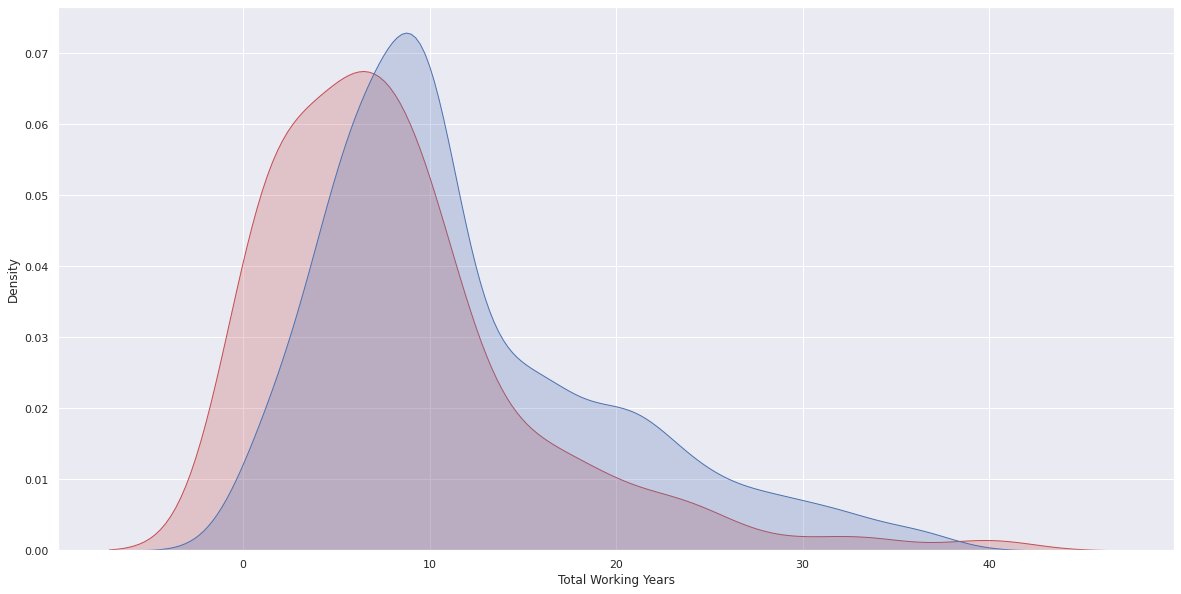

In [112]:
plt.figure(figsize=[20,10])
sns.kdeplot(left_company_df["TotalWorkingYears"], label="Employees who left", shade=True, color="r")
sns.kdeplot(stayed_company_df["TotalWorkingYears"], label="Employees who stayed", shade=True, color="b")

plt.xlabel("Total Working Years")

Text(0.5, 0, 'Years With Current Manager')

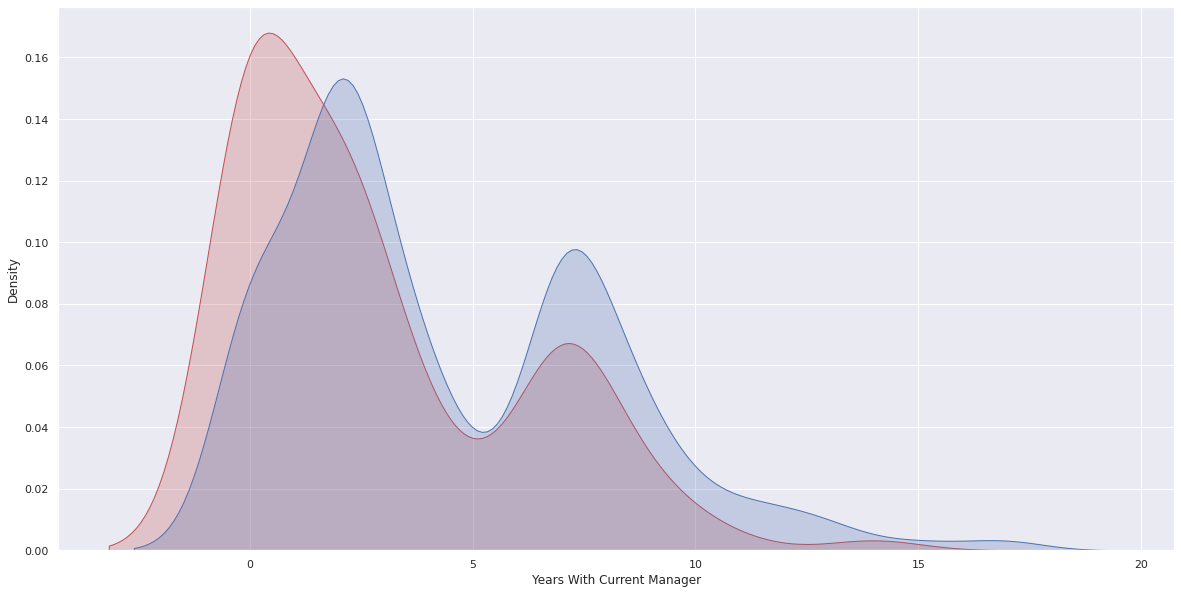

In [113]:
plt.figure(figsize=[20,10])
sns.kdeplot(left_company_df["YearsWithCurrManager"], label="Employees who left", shade=True, color="r")
sns.kdeplot(stayed_company_df["YearsWithCurrManager"], label="Employees who stayed", shade=True, color="b")

plt.xlabel("Years With Current Manager")

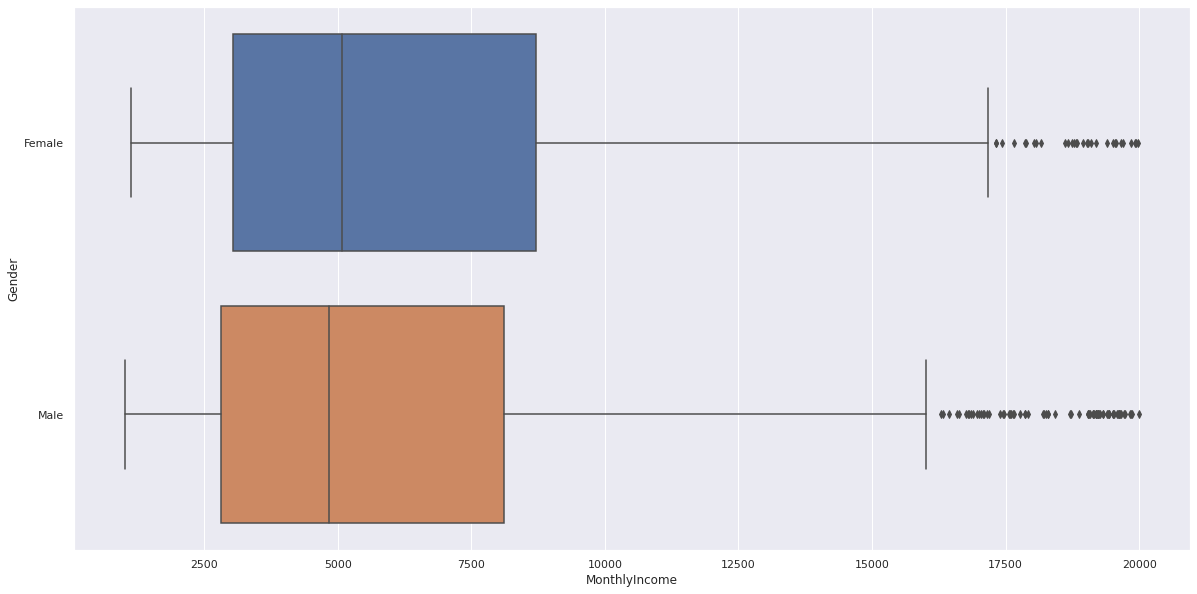

In [114]:
sns.boxplot(x="MonthlyIncome", y="Gender", data=hr_df)

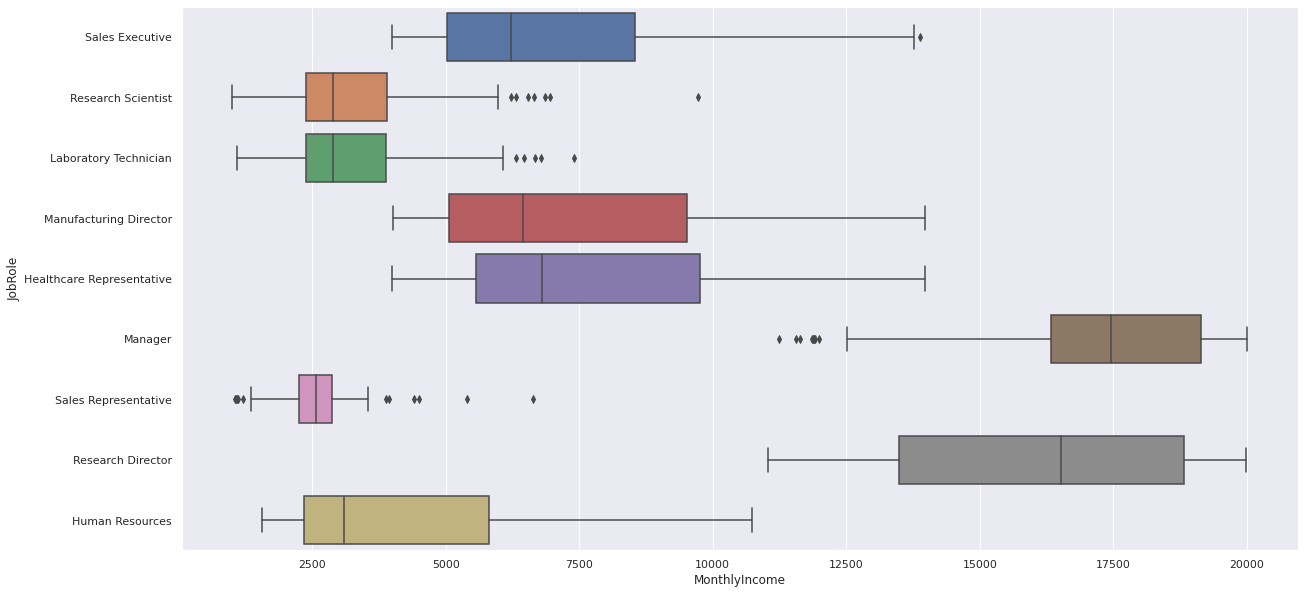

In [115]:
sns.boxplot(x="MonthlyIncome", y="JobRole", data=hr_df)

In [116]:
x_cat = hr_df.select_dtypes(exclude="int64")

In [117]:
x_cat

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married
...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married


In [118]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder()
x_cat = one_hot_encoder.fit_transform(x_cat).toarray()

In [119]:
x_cat = pd.DataFrame(x_cat)

In [120]:
x_cat

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [121]:
x_numeric = hr_df.select_dtypes(include='int64')
x_numeric.drop(["Attrition"], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [122]:
x_numeric

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,12290,4,0,17,3,3,1,17,3,3,5,2,0,3
1466,39,613,6,1,4,42,2,3,1,9991,21457,4,0,15,3,1,1,9,5,3,7,7,1,7
1467,27,155,4,3,2,87,4,2,2,6142,5174,1,1,20,4,2,1,6,0,3,6,2,0,3
1468,49,1023,2,3,4,63,2,2,2,5390,13243,2,0,14,3,4,0,17,3,2,9,6,0,8


In [123]:
x_all = pd.concat([x_cat, x_numeric], axis=1)

In [124]:
x_all

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,41,1102,1,2,2,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,49,279,8,1,3,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,37,1373,2,2,4,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,33,1392,3,4,4,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,27,591,2,1,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,36,884,23,2,3,41,4,2,4,2571,12290,4,0,17,3,3,1,17,3,3,5,2,0,3
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,39,613,6,1,4,42,2,3,1,9991,21457,4,0,15,3,1,1,9,5,3,7,7,1,7
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,27,155,4,3,2,87,4,2,2,6142,5174,1,1,20,4,2,1,6,0,3,6,2,0,3
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,49,1023,2,3,4,63,2,2,2,5390,13243,2,0,14,3,4,0,17,3,2,9,6,0,8


In [125]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x_all)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [126]:
y = hr_df["Attrition"]

In [127]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [128]:
x_test.shape

(368, 50)

In [129]:
y_test.shape

(368,)

In [130]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [131]:
y_pred = model.predict(x_test)

In [132]:
from sklearn.metrics import confusion_matrix, classification_report
print(f"Accuracy: {accuracy_score(y_pred, y_test)}")

Accuracy: 0.9021739130434783


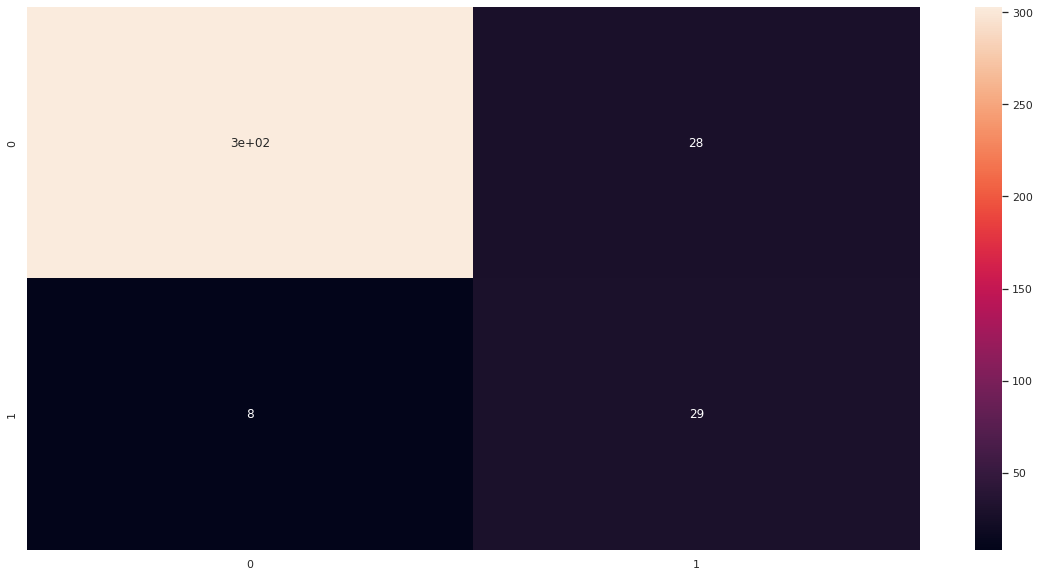

In [133]:
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)

In [134]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       311
           1       0.78      0.51      0.62        57

    accuracy                           0.90       368
   macro avg       0.85      0.74      0.78       368
weighted avg       0.90      0.90      0.89       368



In [135]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [136]:
y_pred = model.predict(x_test)

In [137]:
print(f"Accuracy: {accuracy_score(y_pred, y_test)}")

Accuracy: 0.8559782608695652


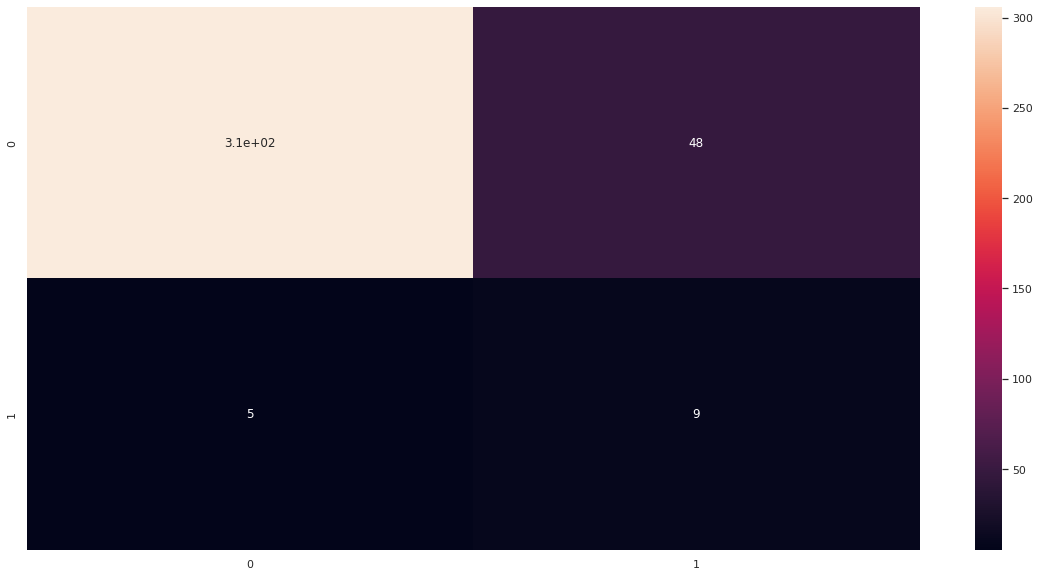

In [138]:
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)

In [139]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       311
           1       0.64      0.16      0.25        57

    accuracy                           0.86       368
   macro avg       0.75      0.57      0.59       368
weighted avg       0.83      0.86      0.82       368



In [93]:
import tensorflow as tf

In [140]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=500, activation="relu", input_shape=(50,)))
model.add(tf.keras.layers.Dense(units=500, activation="relu"))
model.add(tf.keras.layers.Dense(units=500, activation="relu"))
model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [141]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 500)               25500     
                                                                 
 dense_5 (Dense)             (None, 500)               250500    
                                                                 
 dense_6 (Dense)             (None, 500)               250500    
                                                                 
 dense_7 (Dense)             (None, 1)                 501       
                                                                 
Total params: 527,001
Trainable params: 527,001
Non-trainable params: 0
_________________________________________________________________


In [142]:
model.compile(optimizer="Adam", loss="binary_crossentropy", metrics=["accuracy"])

In [143]:
epochs_hist = model.fit(x_train, y_train, epochs=100, batch_size=50)

Epoch 1/100
23/23 [==============================] - 2s 11ms/step - loss: 0.4250 - accuracy: 0.8367
Epoch 2/100
23/23 [==============================] - 0s 11ms/step - loss: 0.3455 - accuracy: 0.8521
Epoch 3/100
23/23 [==============================] - 0s 11ms/step - loss: 0.3233 - accuracy: 0.8784
Epoch 4/100
23/23 [==============================] - 0s 11ms/step - loss: 0.2840 - accuracy: 0.8966
Epoch 5/100
23/23 [==============================] - 0s 10ms/step - loss: 0.2580 - accuracy: 0.8966
Epoch 6/100
23/23 [==============================] - 0s 10ms/step - loss: 0.2263 - accuracy: 0.9165
Epoch 7/100
23/23 [==============================] - 0s 10ms/step - loss: 0.2128 - accuracy: 0.9192
Epoch 8/100
23/23 [==============================] - 0s 10ms/step - loss: 0.1648 - accuracy: 0.9310
Epoch 9/100
23/23 [==============================] - 0s 10ms/step - loss: 0.1550 - accuracy: 0.9419
Epoch 10/100
23/23 [==============================] - 0s 11ms/step - loss: 0.1568 - accuracy: 0.9374

In [144]:
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)

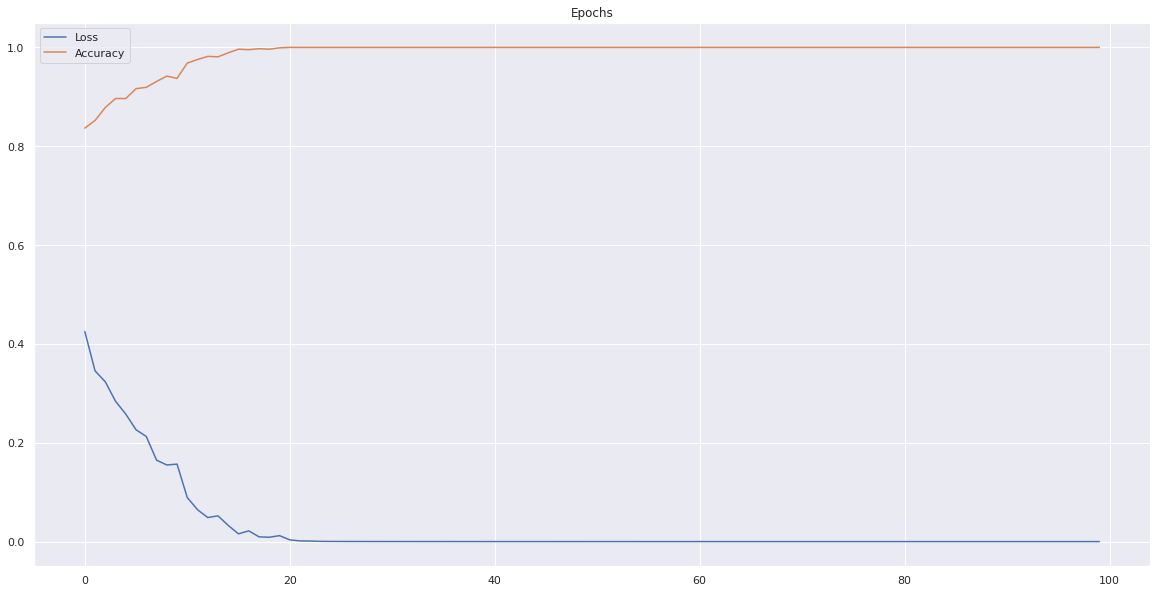

In [152]:
plt.plot(epochs_hist.history["loss"], label="Loss")
plt.plot(epochs_hist.history["accuracy"], label="Accuracy")
plt.title("Epochs")
plt.legend()
plt.show()

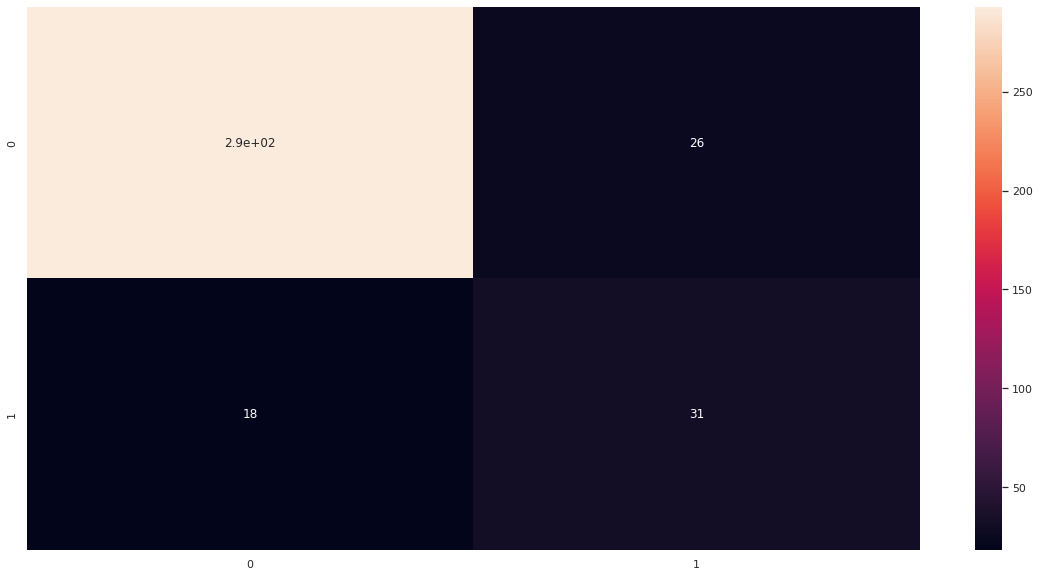

In [153]:
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)

In [154]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       311
           1       0.63      0.54      0.58        57

    accuracy                           0.88       368
   macro avg       0.78      0.74      0.76       368
weighted avg       0.87      0.88      0.88       368

